In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

EXERCISE 1

In [130]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_square.csv')
data.head()

,Diện tích,Giá nhà
0,30.0000,-100.000
1,32.4138,-190.725
2,34.8276,-269.798
3,37.2414,-337.218
4,39.6552,-392.985


In [131]:
class LinearRegression:
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def find_coefficient(self):
        t = np.array(self.df[self.target]).reshape(self.df.shape[0],1)
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        x = np.concatenate((np.ones((self.df.shape[0], 1)), feature), axis= 1)
        w = np.array(np.linalg.inv(x.T.dot(x)).dot(x.T).dot(t)).reshape(feature.shape[1]+1, 1)
        return w

    def add_predict_column(self):
        newdf = self.df.copy()
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        w = self.find_coefficient()
        newdf['predict'] = feature.dot(w[1:,]) + w[0]
        return newdf

    def mse(self):
        newdf = self.add_predict_column()
        return np.mean((newdf['predict'] - newdf[self.target]) ** 2)

    def predict_value(self, list1):
        array = np.array(list1).reshape(1,len(list1))
        w = self.find_coefficient()
        return array.dot(w[1:,]) + w[0]

    def print_model(self):
        feature = (self.df.loc[:, self.df.columns != self.target])
        w = self.find_coefficient()
        print('y =', end=' ')
        for i in range(1, len(w)):
            print(round(float(w[i][0]),2), feature.columns[i-1], '+', end=' ')
        print(round(float(w[0][0]),2))

In [132]:
df = pd.DataFrame(data)
model1 = LinearRegression(df, 'Giá nhà')
print(model1.find_coefficient())
model1.print_model()

[[-1788.5078219 ]
 [   30.00003629]]
y = 30.0 Diện tích + -1788.51


EXERCISE 2

In [133]:
np.random.seed(1234)

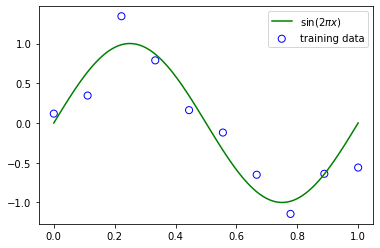

In [134]:
def create_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

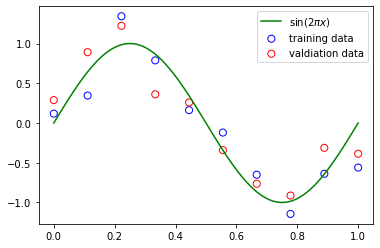

In [135]:
x_val, y_val = create_data(func, 10, 0.25)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

a. fit đa thức bậc 0, 1, 3, 6, 9, vẽ mô hình và nhận xét mô hình

In [136]:
def pre_process(x,num):
    x_new = np.ones((x.shape[0], 1)).reshape(-1,1)
    x = x.reshape(-1,1)
    for i in range(1,num+1):
        x_new = np.hstack((x_new, x**i))
    return x_new

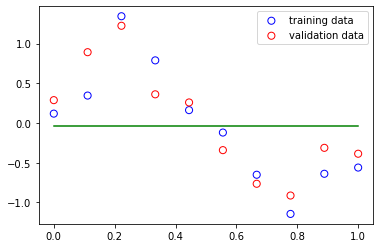

In [137]:
#Bậc 0
x_train_0 = pre_process(x_train, 0)
w = np.dot(np.linalg.inv(np.dot(np.transpose(x_train_0),x_train_0)), np.dot(np.transpose(x_train_0),y_train))
x_test = np.linspace(0, 1, 100)
X_test = pre_process(x_test, 0)
predict = np.dot(X_test,w)

plt.plot(x_test, predict, 'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [138]:
y_predict = np.dot(x_train_0,w)
loss_0 = mse(y_train,y_predict)
pred_val_0 = np.dot(pre_process(x_val, 0),w)
loss_val_0 = mse(y_val,pred_val_0)
print('Loss in training set: {}'.format(loss_0))
print('Loss in validation set: {}'.format(loss_val_0))

Loss in training set: 5.0400977581034345
Loss in validation set: 4.38505108629708


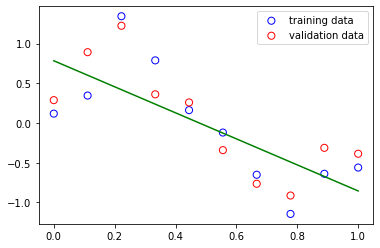

In [139]:
#Bậc 1
x_train_1 = pre_process(x_train, 1)
w = np.dot(np.linalg.inv(np.dot(np.transpose(x_train_1),x_train_1)), np.dot(np.transpose(x_train_1),y_train))
x_test = np.linspace(0, 1, 100)
X_test = pre_process(x_test, 1)
predict = np.dot(X_test,w)

plt.plot(x_test, predict, 'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [140]:
y_predict = np.dot(x_train_1, w)
loss_1 = mse(y_train,y_predict)
predict_val_1 = np.dot(pre_process(x_val,1),w)
loss_val_1 = mse(y_val,predict_val_1)
print('Loss in training set: {}'.format(loss_1))
print('Loss in validation set: {}'.format(loss_val_1))

Loss in training set: 2.307766166378836
Loss in validation set: 1.8132877322593317


=> Underfitting model

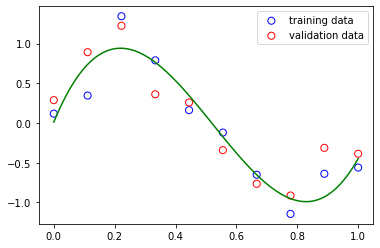

In [141]:
#Bậc 3
x_train_3 = pre_process(x_train, 3)
w = np.dot(np.linalg.inv(np.dot(np.transpose(x_train_3),x_train_3)), np.dot(np.transpose(x_train_3),y_train))
x_test = np.linspace(0, 1, 100)
X_test = pre_process(x_test, 3)
predict = np.dot(X_test,w)

plt.plot(x_test, predict, 'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [142]:
y_pred_3 = np.dot(x_train_3,w)
loss_3 = mse(y_train,y_pred_3)
pred_val_3 = np.dot(pre_process(x_val,3),w)
loss_val_3 = mse(y_val,pred_val_3)
print('Loss in training set: {}'.format(loss_3))
print('Loss in validation set: {}'.format(loss_val_3))

Loss in training set: 0.4982387306784297
Loss in validation set: 0.7772268092530815


=> Fitting model

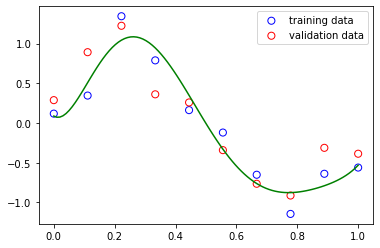

In [152]:
#Bậc 6
x_train_6 = pre_process(x_train, 6)
w = np.dot(np.linalg.inv(np.dot(np.transpose(x_train_6),x_train_6)), np.dot(np.transpose(x_train_6),y_train))
x_test = np.linspace(0, 1, 100)
X_test = pre_process(x_test, 6)
predict = np.dot(X_test,w)

plt.plot(x_test, predict, 'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [153]:
y_pred_6 = np.dot(x_train_6,w)
loss_6 = mse(y_train,y_pred_6)
pred_val_6 = np.dot(pre_process(x_val,6),w)
loss_val_6 = mse(y_val,pred_val_6)
print('Loss in training set: {}'.format(loss_9))
print('Loss in validation set: {}'.format(loss_val_9))

Loss in training set: 1.4083049805148414e-06
Loss in validation set: 0.7855920598167858


=> Overfitting model

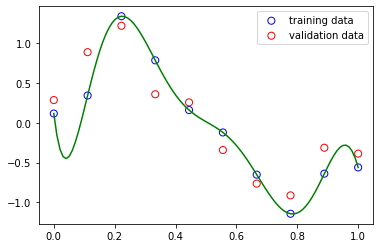

In [145]:
#Bậc 9 
x_train_9 = pre_process(x_train, 9)
w = np.dot(np.linalg.inv(np.dot(np.transpose(x_train_9),x_train_9)), np.dot(np.transpose(x_train_9),y_train))
x_test = np.linspace(0, 1, 100)
X_test = pre_process(x_test, 9)
predict = np.dot(X_test,w)

plt.plot(x_test, predict, 'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [146]:
y_pred_9 = np.dot(x_train_9,w)
loss_9 = mse(y_train,y_pred_9)
pred_val_9 = np.dot(pre_process(x_val,9),w)
loss_val_9 = mse(y_val,pred_val_9)
print('Loss in training set: {}'.format(loss_9))
print('Loss in validation set: {}'.format(loss_val_9))

Loss in training set: 1.4083049805148414e-06
Loss in validation set: 0.7855920598167858


=> Overfitting model

b. thêm 15, 100 điểm dữ liệu cho đa thức bậc 9, nhận xét mức độ overfitting

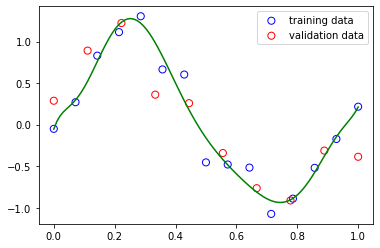

In [147]:
x_train15, y_train15 = create_data(func, 15, 0.25)

x_train_9 = pre_process(x_train15, 9)
w = np.dot(np.linalg.inv(np.dot(np.transpose(x_train_9),x_train_9)), np.dot(np.transpose(x_train_9),y_train15))
x_test = np.linspace(0, 1, 100)
X_test = pre_process(x_test, 9)
predict = np.dot(X_test,w)

plt.plot(x_test, predict, 'g')
plt.scatter(x_train15, y_train15, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

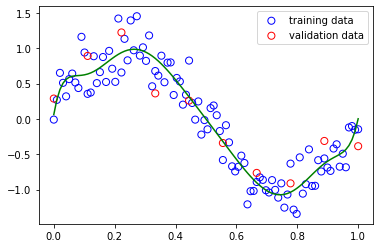

In [151]:
x_train100, y_train100 = create_data(func, 100, 0.25)

x_train_9 = pre_process(x_train100, 9)
w = np.dot(np.linalg.inv(np.dot(np.transpose(x_train_9),x_train_9)), np.dot(np.transpose(x_train_9),y_train100))
x_test = np.linspace(0, 1, 100)
X_test = pre_process(x_test, 9)
predict = np.dot(X_test,w)

plt.plot(x_test, predict, 'g')
plt.scatter(x_train100, y_train100, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

=> Overfitting model